# EMPLOYEE PROMOTION CASE STUDY

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("EMPLOYEE PROMOTION.csv")


In [3]:
df.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score
count,23490.000000,23490.000000,23490.000000,21678.000000,23490.000000,23490.000000,23490.000000
mean,39041.399149,1.254236,34.782929,3.339146,5.810387,0.022776,63.263133
std,22640.809201,0.600910,7.679492,1.263294,4.207917,0.149191,13.411750
min,3.000000,1.000000,20.000000,1.000000,1.000000,0.000000,39.000000
25%,19370.250000,1.000000,29.000000,3.000000,3.000000,0.000000,51.000000
50%,38963.500000,1.000000,33.000000,3.000000,5.000000,0.000000,60.000000
75%,58690.000000,1.000000,39.000000,4.000000,7.000000,0.000000,76.000000
max,78295.000000,9.000000,60.000000,5.000000,34.000000,1.000000,99.000000


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  awards_won?           23490 non-null  int64  
 11  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 2.2+ MB


In [5]:
df.columns


Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'awards_won?', 'avg_training_score'],
      dtype='object')

In [6]:
df.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
awards_won?               int64
avg_training_score        int64
dtype: object

# Data Cleaning

In [7]:
df.isnull().sum()*100/df.shape[0]

employee_id             0.000000
department              0.000000
region                  0.000000
education               4.401873
gender                  0.000000
recruitment_channel     0.000000
no_of_trainings         0.000000
age                     0.000000
previous_year_rating    7.713921
length_of_service       0.000000
awards_won?             0.000000
avg_training_score      0.000000
dtype: float64

In [8]:
df.education.describe()

count          22456
unique             3
top       Bachelor's
freq           15578
Name: education, dtype: object

In [9]:
df.education.isna().value_counts()


education
False    22456
True      1034
Name: count, dtype: int64

In [10]:
df.previous_year_rating.describe()


count    21678.000000
mean         3.339146
std          1.263294
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: previous_year_rating, dtype: float64

In [11]:
df.previous_year_rating.isna().value_counts()

previous_year_rating
False    21678
True      1812
Name: count, dtype: int64

In [12]:
df.isnull().info()
print("\n\nDataset is absolutely affirmative\n")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   employee_id           23490 non-null  bool 
 1   department            23490 non-null  bool 
 2   region                23490 non-null  bool 
 3   education             23490 non-null  bool 
 4   gender                23490 non-null  bool 
 5   recruitment_channel   23490 non-null  bool 
 6   no_of_trainings       23490 non-null  bool 
 7   age                   23490 non-null  bool 
 8   previous_year_rating  23490 non-null  bool 
 9   length_of_service     23490 non-null  bool 
 10  awards_won?           23490 non-null  bool 
 11  avg_training_score    23490 non-null  bool 
dtypes: bool(12)
memory usage: 275.4 KB


Dataset is absolutely affirmative



In [13]:
emp_non_test_data = df
emp_non_test_data

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,61
...,...,...,...,...,...,...,...,...,...,...,...,...
23485,53478,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,61
23486,25600,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,74
23487,45409,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,50
23488,1186,Procurement,region_31,Bachelor's,m,sourcing,3,27,NaN,1,0,70


In [14]:
df.drop(['employee_id'],axis=1,inplace=True)


In [15]:
df.describe().style.background_gradient(cmap = "summer")


,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score
count,23490.000000,23490.000000,21678.000000,23490.000000,23490.000000,23490.000000
mean,1.254236,34.782929,3.339146,5.810387,0.022776,63.263133
std,0.600910,7.679492,1.263294,4.207917,0.149191,13.411750
min,1.000000,20.000000,1.000000,1.000000,0.000000,39.000000
25%,1.000000,29.000000,3.000000,3.000000,0.000000,51.000000
50%,1.000000,33.000000,3.000000,5.000000,0.000000,60.000000
75%,1.000000,39.000000,4.000000,7.000000,0.000000,76.000000
max,9.000000,60.000000,5.000000,34.000000,1.000000,99.000000


# Exploratory data analysis (EDA) part

In [16]:
df

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score
0,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,0,77
1,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,51
2,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,47
3,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,65
4,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,61
...,...,...,...,...,...,...,...,...,...,...,...
23485,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,61
23486,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,74
23487,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,50
23488,Procurement,region_31,Bachelor's,m,sourcing,3,27,NaN,1,0,70


In [17]:
df.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score
0,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,0,77
1,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,51
2,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,47
3,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,65
4,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,61


In [18]:
df.tail()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score
23485,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,61
23486,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,74
23487,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,50
23488,Procurement,region_31,Bachelor's,m,sourcing,3,27,NaN,1,0,70
23489,Technology,region_17,Master's & above,m,other,3,40,5.0,5,0,89


In [19]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            23490 non-null  object 
 1   region                23490 non-null  object 
 2   education             22456 non-null  object 
 3   gender                23490 non-null  object 
 4   recruitment_channel   23490 non-null  object 
 5   no_of_trainings       23490 non-null  int64  
 6   age                   23490 non-null  int64  
 7   previous_year_rating  21678 non-null  float64
 8   length_of_service     23490 non-null  int64  
 9   awards_won?           23490 non-null  int64  
 10  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 2.0+ MB


In [20]:
df.describe()

,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score
count,23490.000000,23490.000000,21678.000000,23490.000000,23490.000000,23490.000000
mean,1.254236,34.782929,3.339146,5.810387,0.022776,63.263133
std,0.600910,7.679492,1.263294,4.207917,0.149191,13.411750
min,1.000000,20.000000,1.000000,1.000000,0.000000,39.000000
25%,1.000000,29.000000,3.000000,3.000000,0.000000,51.000000
50%,1.000000,33.000000,3.000000,5.000000,0.000000,60.000000
75%,1.000000,39.000000,4.000000,7.000000,0.000000,76.000000
max,9.000000,60.000000,5.000000,34.000000,1.000000,99.000000


In [21]:
df['department']



0               Technology
1                       HR
2        Sales & Marketing
3              Procurement
4                  Finance
               ...        
23485                Legal
23486           Technology
23487                   HR
23488          Procurement
23489           Technology
Name: department, Length: 23490, dtype: object

In [22]:
df['department'].unique()

array(['Technology', 'HR', 'Sales & Marketing', 'Procurement', 'Finance',
       'Analytics', 'Operations', 'Legal', 'R&D'], dtype=object)

In [23]:
df['department'].count()

23490

In [24]:
df['awards_won?'].unique()


array([0, 1], dtype=int64)

In [25]:
df

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score
0,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,0,77
1,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,51
2,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,47
3,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,65
4,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,61
...,...,...,...,...,...,...,...,...,...,...,...
23485,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,61
23486,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,74
23487,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,50
23488,Procurement,region_31,Bachelor's,m,sourcing,3,27,NaN,1,0,70


In [26]:
                       
cross_tab_data_edu_gen= pd.crosstab(df["education"],df["gender"])


In [27]:
cross_tab_data_edu_gen

gender,f,m
education,,
Bachelor's,4516,11062
Below Secondary,126,248
Master's & above,2073,4431


In [28]:
cross_tab_data_dept_reg = pd.crosstab(df["department"],df["region"])
cross_tab_data_dept_reg


region,region_1,region_10,region_11,region_12,region_13,region_14,region_15,region_16,region_17,region_18,...,region_31,region_32,region_33,region_34,region_4,region_5,region_6,region_7,region_8,region_9
department,,,,,,,,,,,,,,,,,,,,,
Analytics,27,17,46,8,59,12,84,26,11,0,...,115,92,0,34,72,19,29,161,22,34
Finance,2,2,22,2,54,9,35,10,0,0,...,42,40,0,1,40,3,21,91,8,3
HR,2,7,20,5,33,9,21,16,10,0,...,35,31,2,2,17,8,7,100,5,0
Legal,0,0,6,3,24,0,8,8,1,0,...,23,7,0,2,5,9,3,40,0,1
Operations,14,31,128,58,211,81,419,118,36,1,...,156,120,11,34,200,27,58,344,85,18
Procurement,8,63,75,25,176,55,143,74,178,0,...,84,4,14,21,73,59,29,253,53,3
R&D,0,4,21,0,10,0,18,4,1,0,...,8,4,0,0,29,1,1,38,6,0
Sales & Marketing,158,86,209,95,430,127,315,244,82,18,...,287,121,32,52,270,90,122,627,56,113
Technology,27,59,44,19,170,57,87,90,42,1,...,94,14,67,9,69,126,28,328,34,8


# Data visualization using Seaborn and Matplotlib.pyplot



In [29]:
sns.set()

# Pairplot of Employee Promotion Data (Bi-variate analysis)

C:\Users\mouno\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


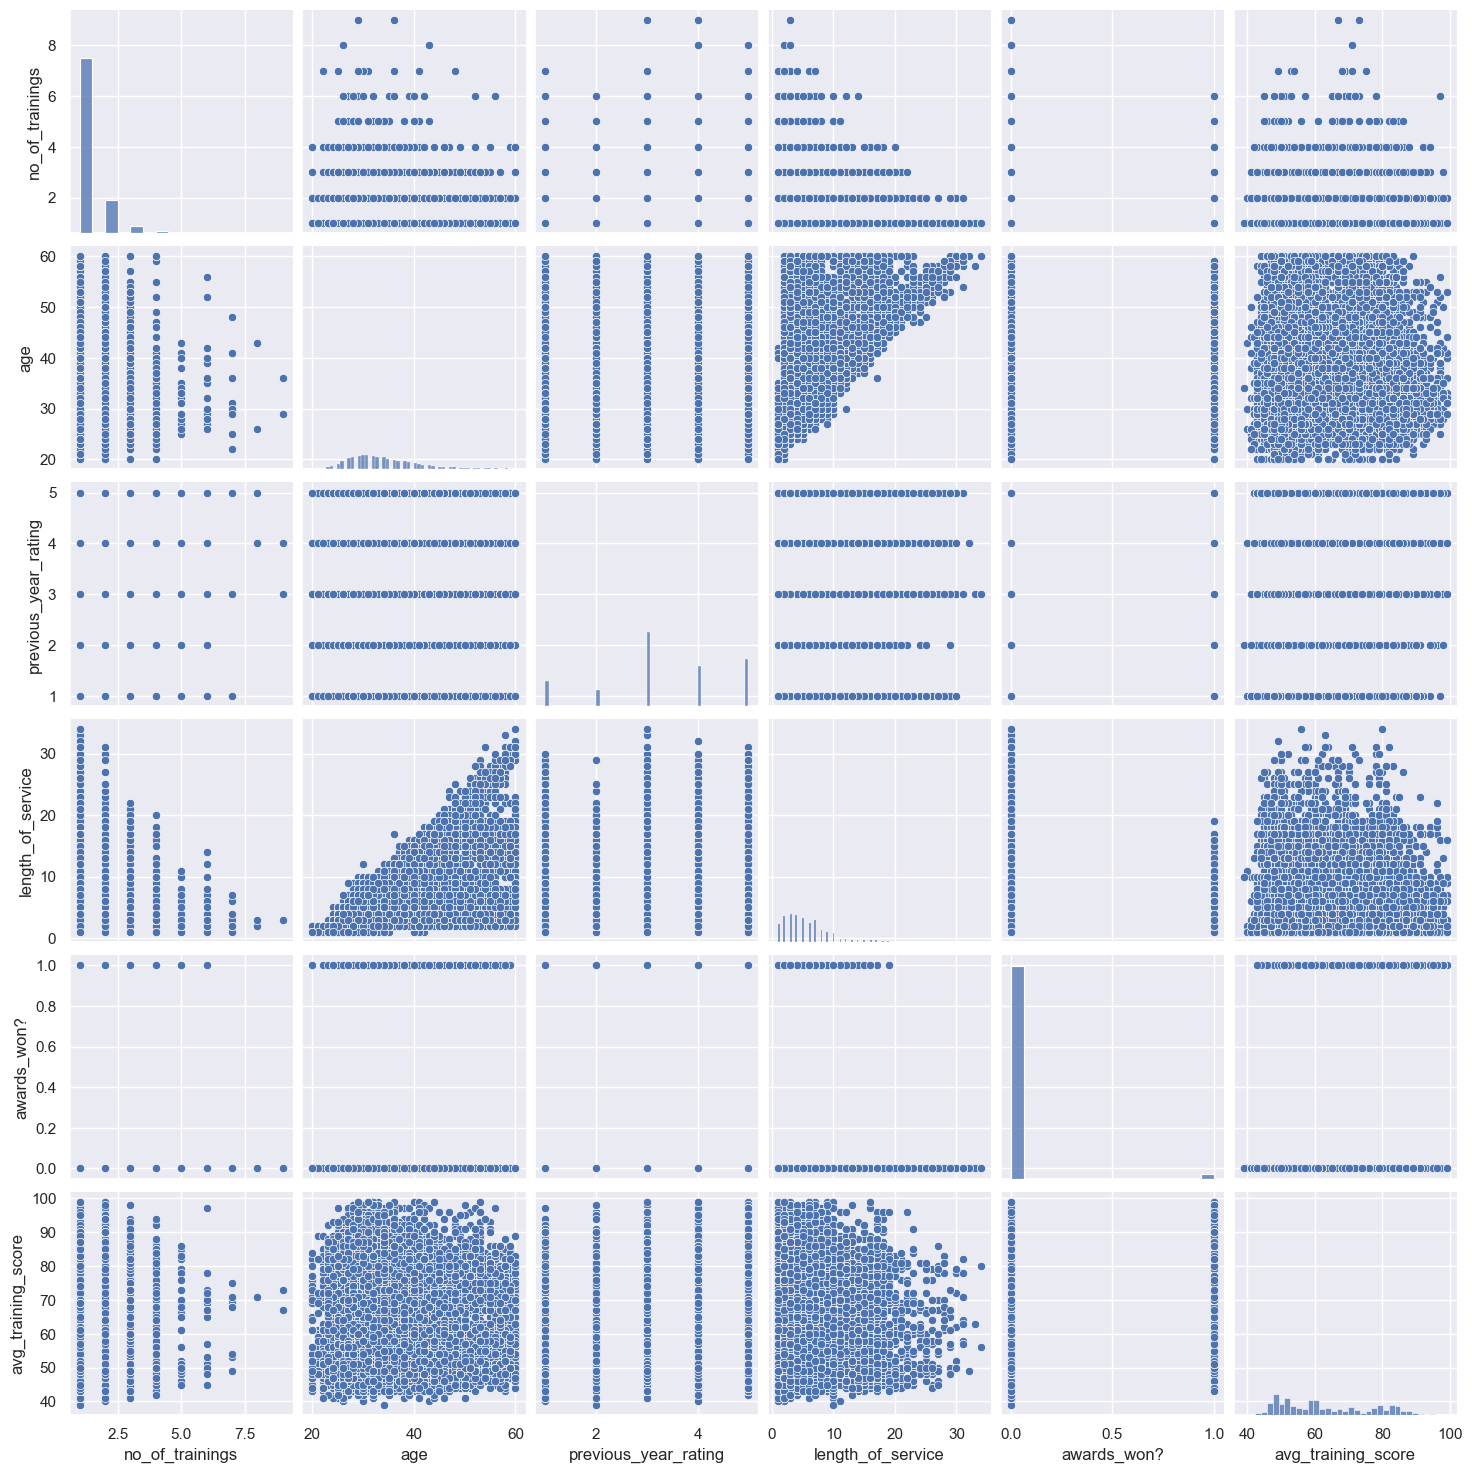

In [30]:
sns.pairplot(df)
plt.show()

# Heatmap of Employee Promotion Data


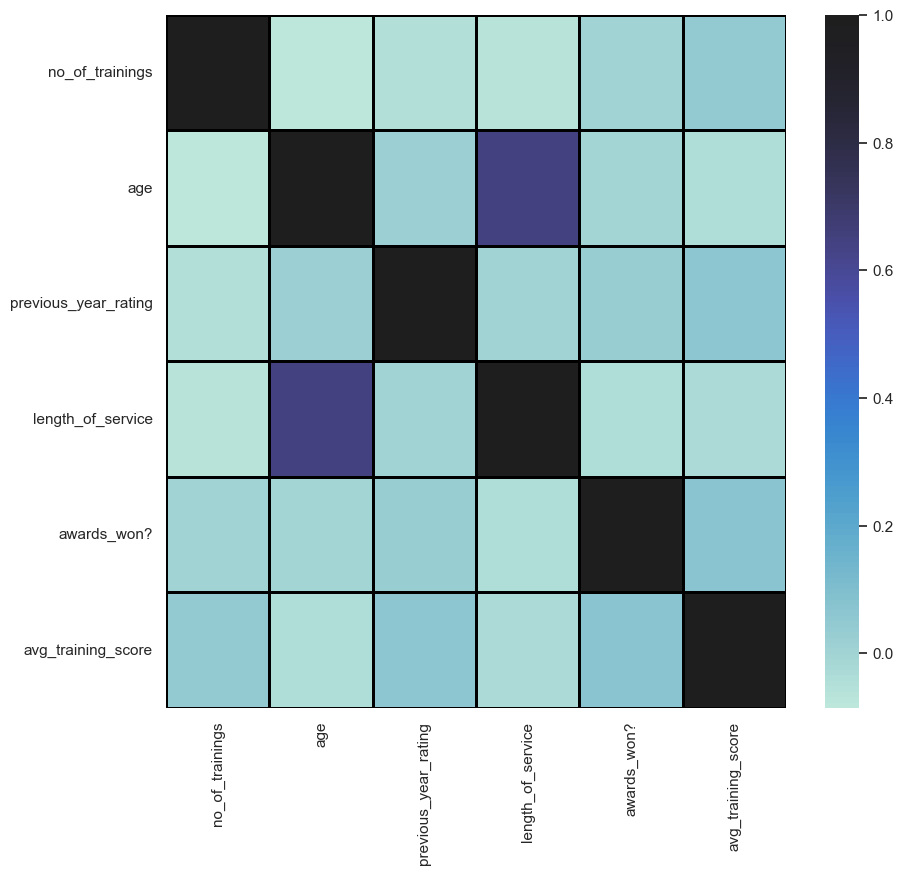

In [41]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
numeric_df = df[numeric_columns]

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 9))
sns.set()
sns.heatmap(numeric_df.corr(), center=True, linewidths=2, linecolor='black')
plt.show()

In [33]:
df.dtypes

department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
awards_won?               int64
avg_training_score        int64
dtype: object

<Figure size 1900x600 with 0 Axes>

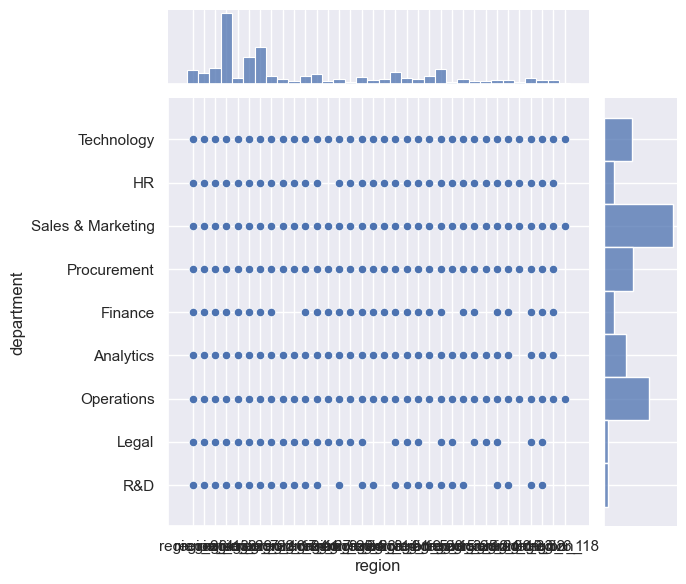

In [40]:
plt.figure(figsize=(19,6))
sns.jointplot(data=df,x="region",y="department")
plt.show()

In [42]:
import numpy.random as rd

In [47]:
max_set=[]
for i in range(0,23490):
    if(i%4==0):
        max_set.append(1)
    else:
        max_set.append(0)

In [48]:
df["is_promoted"] = max_set

In [49]:
df

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,0,77,1
1,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,51,0
2,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,47,0
3,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,65,0
4,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,61,1
...,...,...,...,...,...,...,...,...,...,...,...,...
23485,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,61,0
23486,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,74,0
23487,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,50,0
23488,Procurement,region_31,Bachelor's,m,sourcing,3,27,NaN,1,0,70,1


In [50]:
df["is_promoted"].unique()

array([1, 0], dtype=int64)

In [51]:
df["is_promoted"].value_counts()


is_promoted
0    17617
1     5873
Name: count, dtype: int64

In [52]:
is_promoted_no = 17617
is_promoted_yes = 5873
is_promoted_tot = is_promoted_no+is_promoted_yes

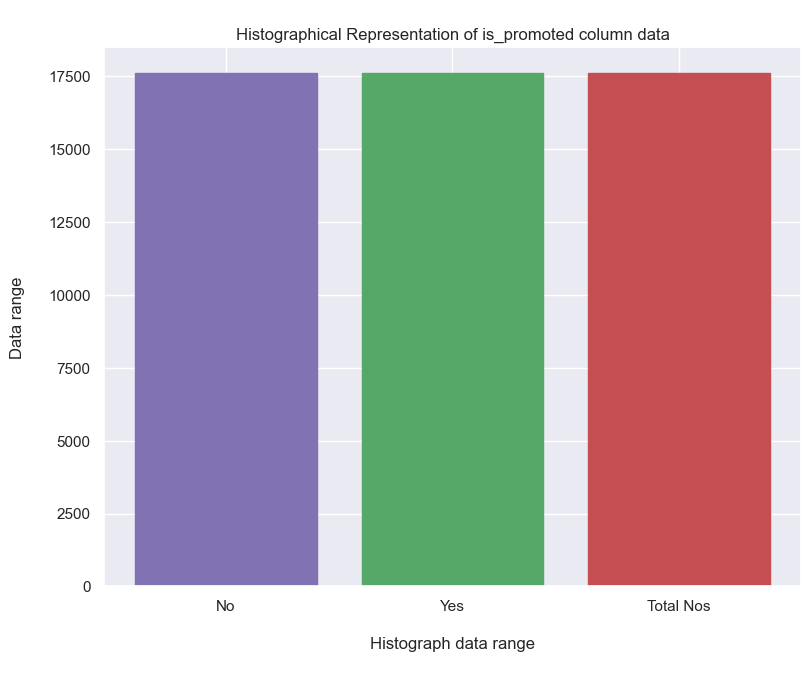

In [65]:
plt.figure(figsize=(9,7))
is_promoted_bar = plt.bar(["No","Yes","Total Nos"],[is_promoted_no])
is_promoted_bar[0].set_color("m")
is_promoted_bar[1].set_color("g")
is_promoted_bar[2].set_color("r")
plt.xlabel("\nHistograph data range\n",fontsize=12)
plt.ylabel("Data range\n",fontsize=12)
plt.title("\nHistographical Representation of is_promoted column data")
plt.show()

In [66]:
df.shape
print(f"\nShape of emp_data = 23490 (rows) * 12 (cols)\n")



Shape of emp_data = 23490 (rows) * 12 (cols)



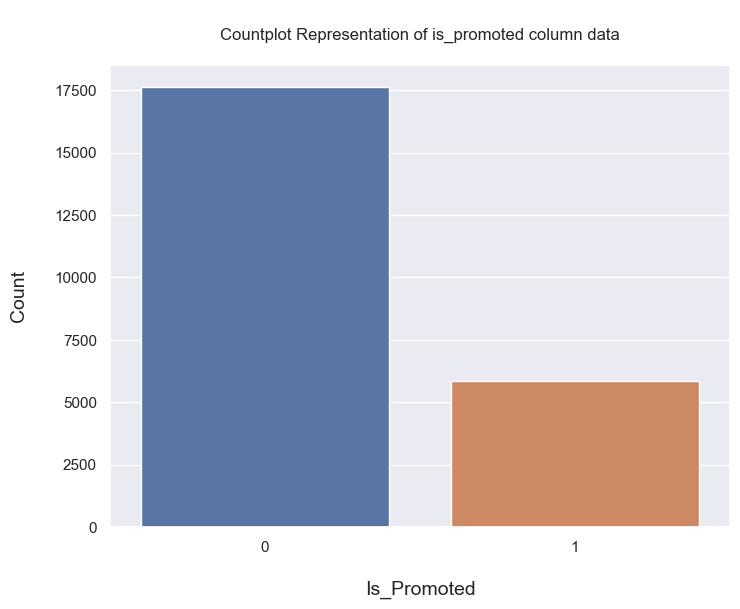

In [68]:
plt.figure(figsize=(8,6))
sns.countplot(x=df.is_promoted)
plt.title("\nCountplot Representation of is_promoted column data\n")
plt.xlabel("\nIs_Promoted",fontsize=14)
plt.ylabel("Count\n",fontsize=14)
plt.show()


C:\Users\mouno\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


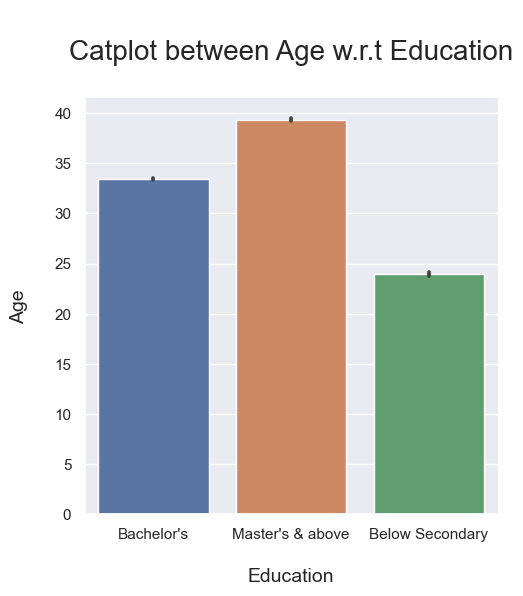

In [71]:
sns.catplot(x="education", y="age", kind="bar", data=df)
plt.title("\nCatplot between Age w.r.t Education\n",fontsize=20)
plt.xlabel("\nEducation",fontsize=14)
plt.ylabel("Age\n",fontsize=14)
plt.show()

# Line & Scatter Representation of Data (Uni-variate analysis)

Text(0.5, 1.0, '\n\n\n\nDepartment\n')

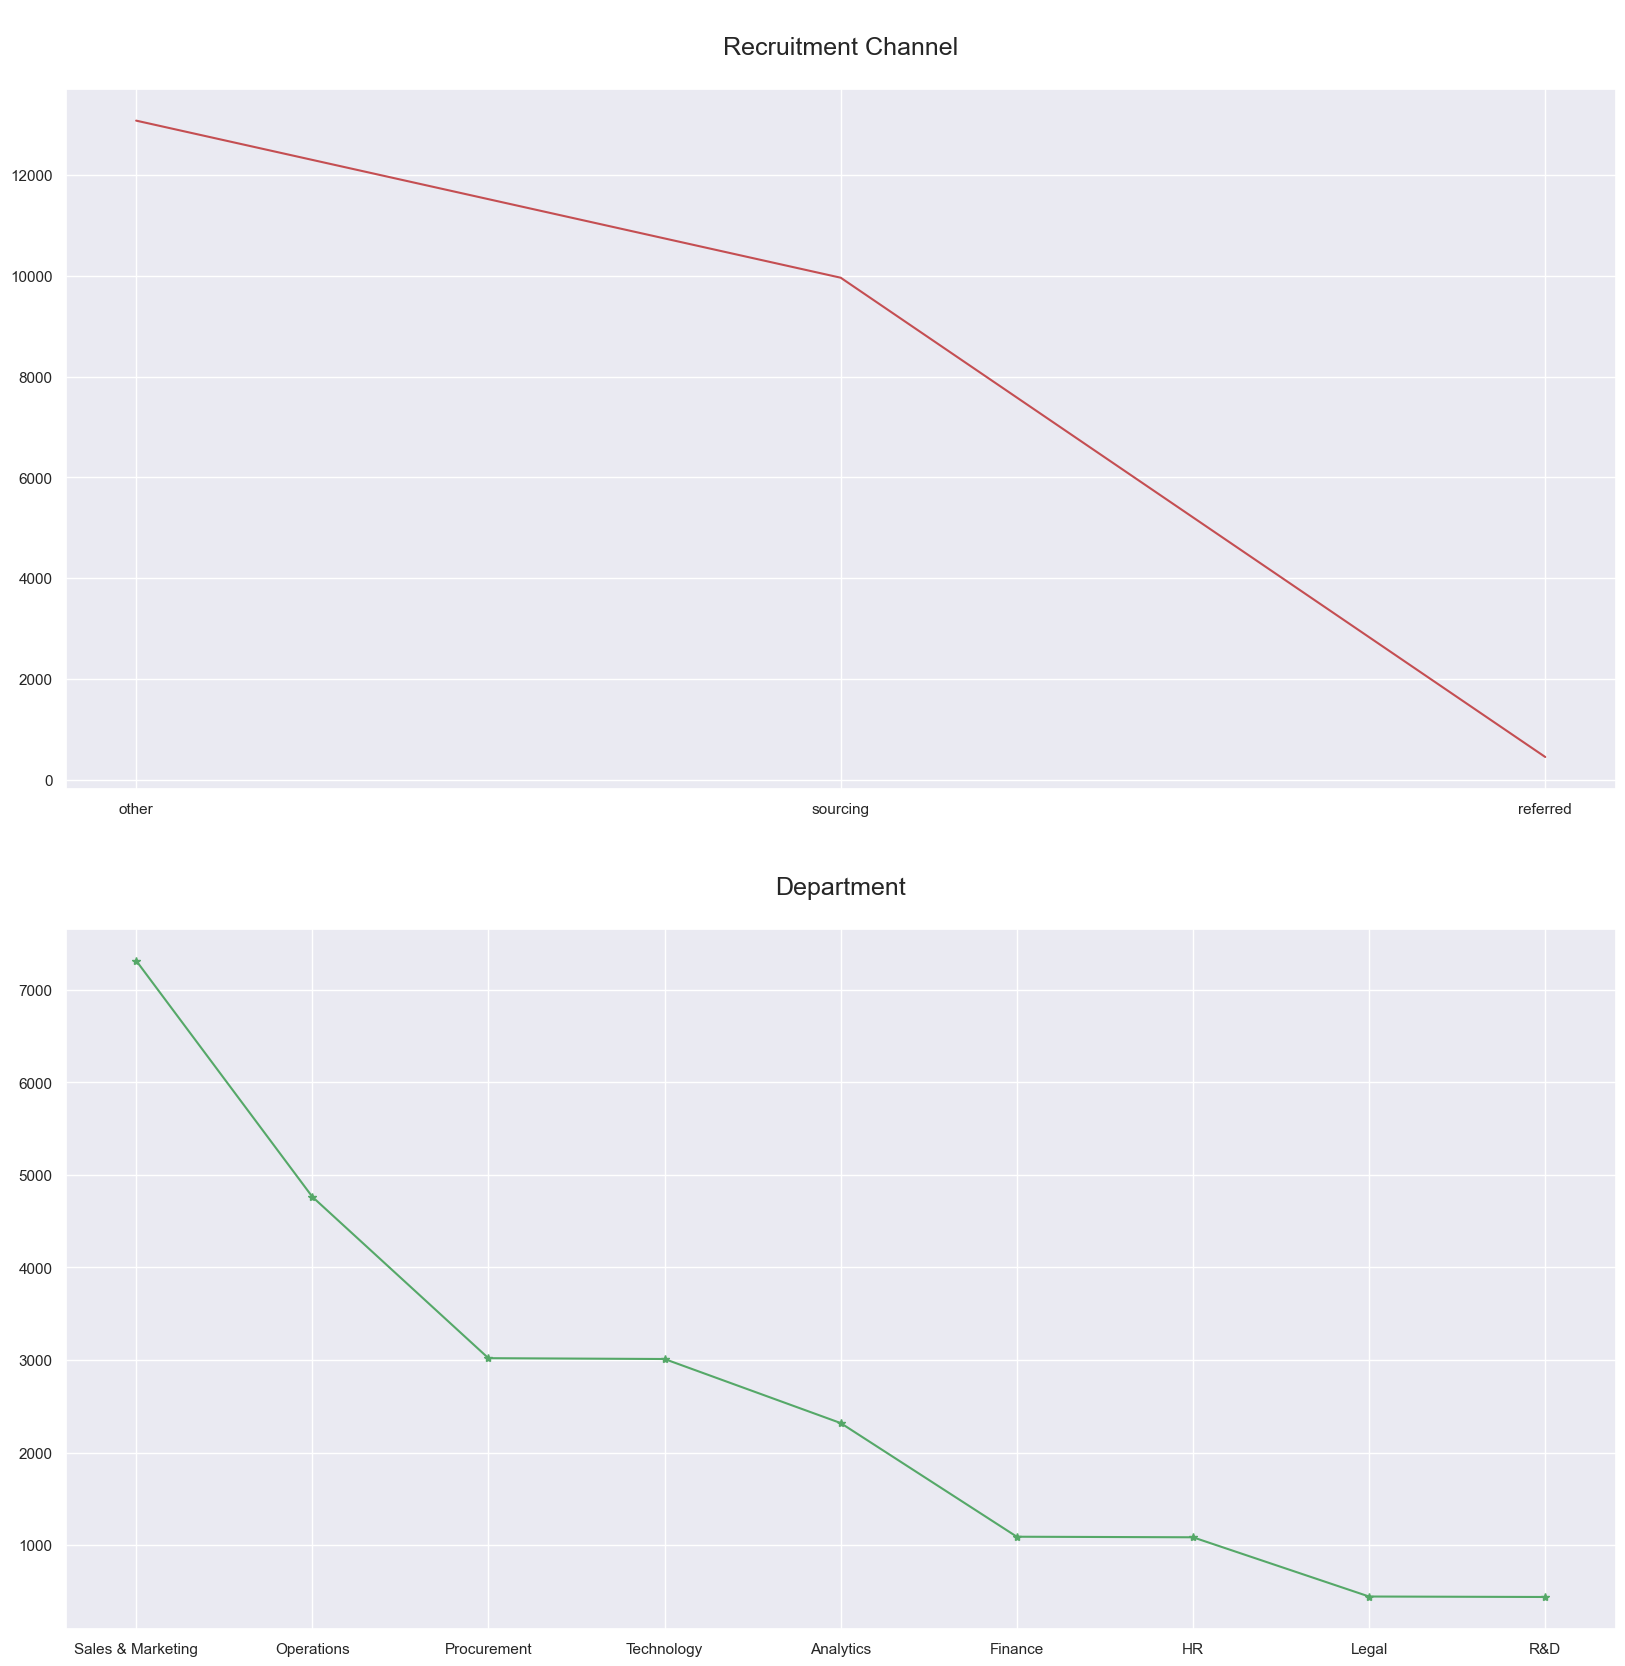

In [78]:
fig = plt.figure(figsize=(20,20))
a1 = fig.add_subplot(2,1,1)
a2 = fig.add_subplot(2,1,2)
# ploting line & scatter chart
a1.plot(df.recruitment_channel.value_counts(),color="r")
a1.set_title('\nRecruitment Channel\n',fontsize=18)
a2.plot(df.department.value_counts(),color="g",marker="*")
a2.set_title('\n\n\n\nDepartment\n',fontsize=18)

# Pie chart representation


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            23490 non-null  object 
 1   region                23490 non-null  object 
 2   education             22456 non-null  object 
 3   gender                23490 non-null  object 
 4   recruitment_channel   23490 non-null  object 
 5   no_of_trainings       23490 non-null  int64  
 6   age                   23490 non-null  int64  
 7   previous_year_rating  21678 non-null  float64
 8   length_of_service     23490 non-null  int64  
 9   awards_won?           23490 non-null  int64  
 10  avg_training_score    23490 non-null  int64  
 11  is_promoted           23490 non-null  int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 2.2+ MB


In [80]:
df.education.value_counts()


education
Bachelor's          15578
Master's & above     6504
Below Secondary       374
Name: count, dtype: int64

In [81]:
df = np.array([ 15578,6504,374])
ed_names = ['Bachelors','Masters & above','Below Secondary']

In [92]:
df = np.array([['Technology'], ['Sales& Marketing'], ['Technology'], 
               ['Finance'],['HR'],['Procurement'],['Analytics'],['Operations']
               ,['Legal'],['R&D']])

# Convert the NumPy array to a Pandas DataFrame
df = pd.DataFrame(df, columns=['department'])

# Now you can use value_counts()
counts = df['department'].value_counts()

# Print the result
print(counts)

department
Technology          2
Sales& Marketing    1
Finance             1
HR                  1
Procurement         1
Analytics           1
Operations          1
Legal               1
R&D                 1
Name: count, dtype: int64


In [95]:
dep_data = np.array([2,1,1,1,1,1,1,1,1])
dep_names = ['Sales & Marketing','Operations','Technology','Procurement',
'Analytics','Operations','Legal','R&D']   

In [2]:
df = np.array([['m'],['f']])

# Convert the NumPy array to a Pandas DataFrame
df = pd.DataFrame(df, columns=['gender'])

# Now you can use value_counts()
counts = df['gender'].value_counts()

# Print the result
print(counts)

gender
m    1
f    1
Name: count, dtype: int64


In [3]:
df.gender.value_counts()

gender
m    1
f    1
Name: count, dtype: int64